 # StartUpJN

This jupyter-notebook is used to show how ExoCcycle classes, functions, and methods are used to

1) Generate bathymetry models (as shown) and carbon cycle model parameters.
2) Determine communities from bathymetry


## Download present-day measured seafloor bathymetry and plot global characteristics

/home/bogumil/anaconda3/envs/ExoCcycle/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



The following folder(s) exists within current directory:
/home/bogumil/Documents/External_fids/ExoCcycle-workspace/topographies, /home/bogumil/Documents/External_fids/ExoCcycle-workspace/topographies/Earth, /home/bogumil/Documents/External_fids/ExoCcycle-workspace/topographies/Venus, /home/bogumil/Documents/External_fids/ExoCcycle-workspace/topographies/Mars, /home/bogumil/Documents/External_fids/ExoCcycle-workspace/topographies/Moon

The following folder(s) exists within current directory:
/home/bogumil/Documents/External_fids/ExoCcycle-workspace/bathymetries, /home/bogumil/Documents/External_fids/ExoCcycle-workspace/bathymetries/Earth, /home/bogumil/Documents/External_fids/ExoCcycle-workspace/bathymetries/Venus, /home/bogumil/Documents/External_fids/ExoCcycle-workspace/bathymetries/Mars, /home/bogumil/Documents/External_fids/ExoCcycle-workspace/bathymetries/Moon


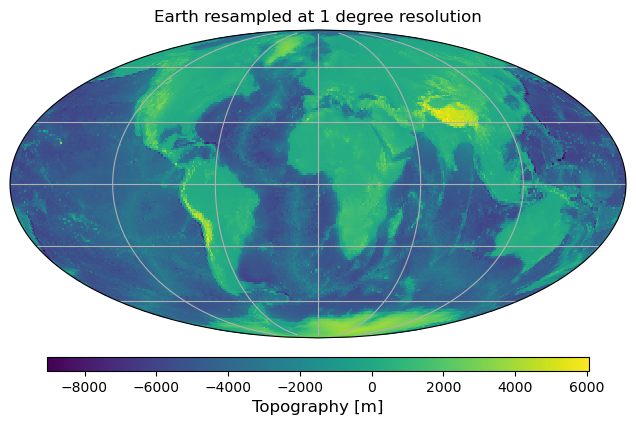

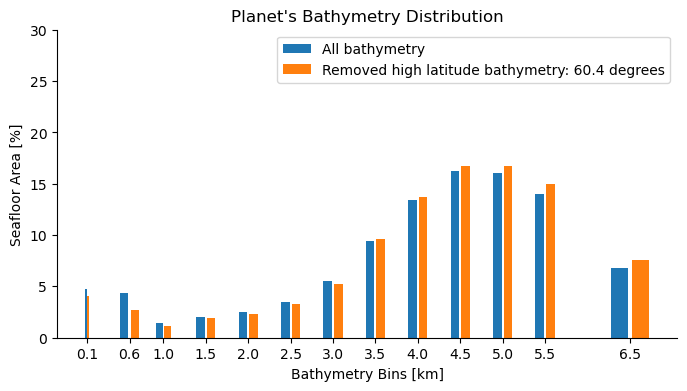

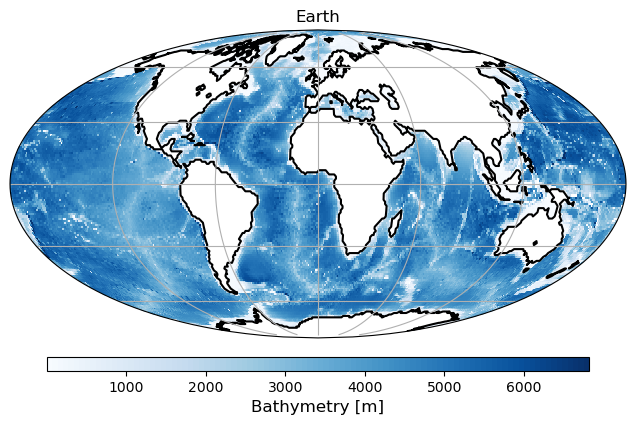

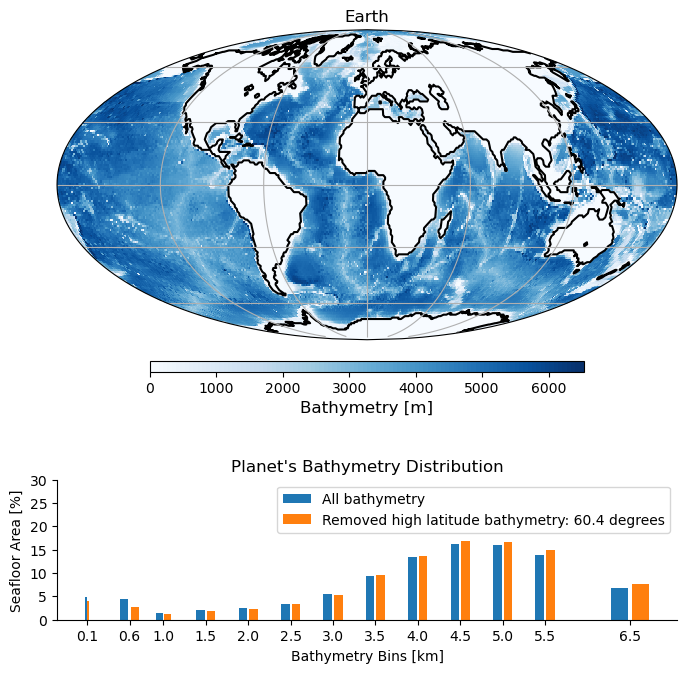

In [1]:
# Import necessary libraries
import ExoCcycle as EC
import matplotlib as mpl
import numpy as np
import os

# Create bathymetry object with body=... attributes
# Try setting body='mars' | 'earth' | 'moon', 'Venus'
body="Earth"
planetBathy = EC.Bathymetry.BathyMeasured(body=body)

# Create the directory if it doesn't exist
directory_name = os.getcwd()+"/topographies/{}".format(planetBathy.model)
os.makedirs(directory_name, exist_ok=True)

# Download topography model (note that is must only be done once per body).
# NOTE: UNCOMMENT THIS SECTION TO DOWNLOAD TOPOGRAPHY MODEL
planetBathy.getTopo(os.getcwd(),
                  verbose=True);

# Read topography. This method will generate a topography model netCDF4 file with
# new_resolution, in degrees. Note that the generated topography model will be
# cell registered (All calculations from here on out are in cell registered to
# simplify codes and reduce data loss on conversions).
planetBathy.readTopo(os.getcwd(),
                   new_resolution=1,
                   verbose=False);

# Generate a bathymetry model base on a set of input methods and properties. The setSeaLelvel
# method has multiple ways to fill topography with oceans. The two currently implemented at
# the time of this JN creation are as follows:
#     1) basinVolume : An option to define bathymetry by flooding topography with
#                      basinVolume['uncompactedVol'] amount of ocean water, in m3.
#     2) OceanArea : Option to define bathymetry by flooding topography until
#                    oceanArea['area'], decimal percent, of global area is covered
#                    with oceans.
#
# Here, I use the OceanArea constraint and block the basinVolume constraint with comments.
#
planetBathy.setSeaLevel(basinVolume = {"on":False, 'uncompactedVol':None},
                      oceanArea = {"on":True, "area":0.7},
                      isostaticCompensation = {"on":False}, verbose=False)

# Note that in this basinVolume example the uncompactedVol was set to the oceanArea
# bathymetry model's VOC, where oceanArea = {"on":True, "area":0.7}.
#
# planetBathy.setSeaLevel(basinVolume = {"on":True, 'uncompactedVol':3.299187952154623e+17},
#                       oceanArea = {"on":False, "area":0.7},
#                       isostaticCompensation = {"on":False}, verbose=False)


# Save bathymetry model as netCDF4. Note that models will be saved under the same root folder
# that was supplied to the readTopo(...) method.
#
# only the bathymetry array is saved in this file. Other relevant values are represented
# as vectors (e.g., lat, lon, area-weights, global bathymetery distributions, etc) or
# attributes (e.g., VOC, AOC, high latitude cutoff, etc).
#
planetBathy.saveBathymetry()

#
# To see a full set of stored netCDF4 values, the user can uncomment the code below
#
# planetBathy.readBathymetry()
# print(planetBathy.bathync)
# print(planetBathy.bathync.variables)

# Plot bathymetry model
blues_cm = mpl.colormaps['Blues'].resampled(100)
EC.utils.plotGlobal(planetBathy.lat, planetBathy.lon, planetBathy.bathymetry,
                    outputDir = planetBathy.data_dir+"/bathymetries/{}".format(planetBathy.model),
                    fidName = "{}-setSeaLevel_Area0p7.png".format(planetBathy.model),
                    cmapOpts={"cmap":blues_cm,
                              "cbar-title":"cbar-title",
                              "cbar-range":[np.nanmin(np.nanmin(planetBathy.bathymetry)),
                                            np.nanmean(planetBathy.bathymetry)+2*np.nanstd(planetBathy.bathymetry)]},
                    pltOpts={"valueType": "Bathymetry",
                             "valueUnits": "m",
                             "plotTitle":"{}".format(planetBathy.model),
                             "plotZeroContour":True},
                    savePNG = True)


# Plot bathymetry model w/ bathymetry histograms
EC.utils.plotGlobalwHist(planetBathy.lat, planetBathy.lon, planetBathy.bathymetry,
                        planetBathy.binEdges, planetBathy.bathymetryAreaDist_wHighlat, planetBathy.bathymetryAreaDist, planetBathy.highlatlat,
                        outputDir = planetBathy.data_dir+"/bathymetries/{}".format(planetBathy.model),
                        fidName = "{}-setSeaLevel_Area0p7.png".format(planetBathy.model),
                        cmapOpts={"cmap":blues_cm,
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[np.nanmin(np.nanmin(planetBathy.bathymetry)),
                                                np.nanmean(planetBathy.bathymetry)+2*np.nanstd(planetBathy.bathymetry)]},
                        pltOpts={"valueType": "Bathymetry",
                                 "valueUnits": "m",
                                 "plotTitle":"{}".format(planetBathy.model),
                                 "plotZeroContour":True},
                        savePNG = True)



### Find communties using Leiden Method

0.01 1 12
Storing images in figures/CommunityDetectionMethodsPaper/CompositeMethod_Leiden_14

All fields
---------------
Field1
	dataGrid: /home/bogumil/Documents/External_fids/ExoCcycle-workspace/bathymetries/Earth/Earth_resampled_1.0deg.nc
	parameter: bathymetry
	parameterUnit: m
	parameterName: bathymetry


Used fields
---------------
Field1
	dataGrid: /home/bogumil/Documents/External_fids/ExoCcycle-workspace/bathymetries/Earth/Earth_resampled_1.0deg.nc
	parameter: bathymetry
	parameterUnit: m
	parameterName: bathymetry

File /home/bogumil/Documents/External_fids/ExoCcycle-workspace/eaNodes/EA_Nodes_1.0.npz does exist. loading. /home/bogumil/Documents/External_fids/ExoCcycle-workspace/eaNodes/EA_Nodes_1.0.npz will be read for current use.
Attributes loaded from /home/bogumil/Documents/External_fids/ExoCcycle-workspace/eaNodes/EA_Nodes_1.0.npz


sh: 1: temp.txt: not found
100%|███████████████████████████████████| 24441/24441 [00:07<00:00, 3349.58it/s]


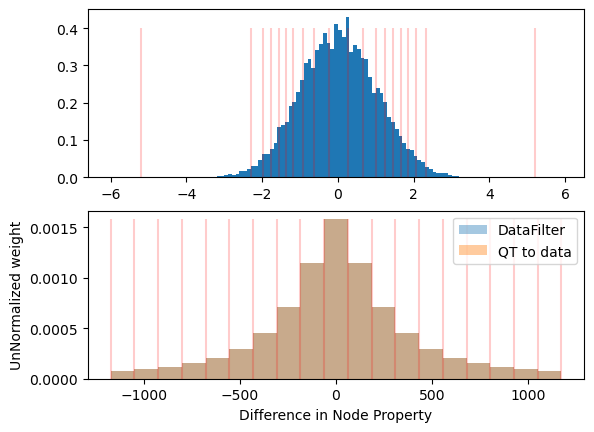

100%|████████████████████████████████████| 24441/24441 [00:36<00:00, 678.23it/s]


Network has been overwritten.


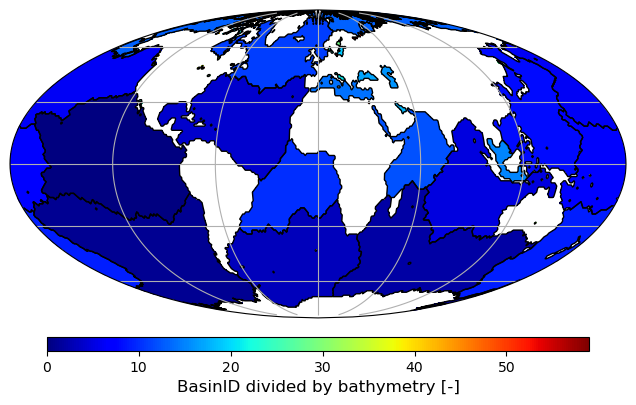

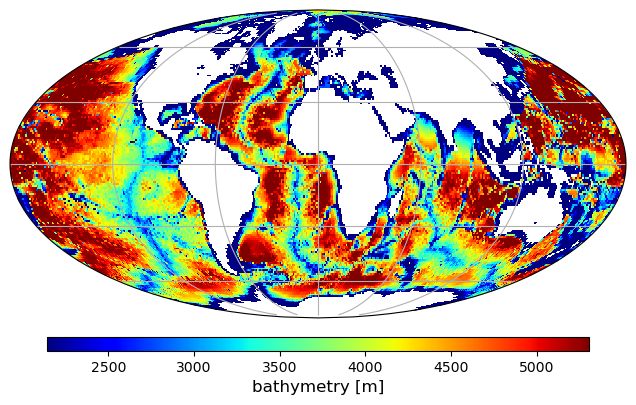

In [2]:
#################################################
#################### Imports ####################
#################################################
import os
import ExoCcycle as EC
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from netCDF4 import Dataset


#########################################
### Define Community Detection Inputs ###
#########################################
# Set the detection method
# Options:
#     "Louvain", "Louvain-Girvan-Newman",
#     "Leiden", "Leiden-Girvan-Newman"
communityDetectionMethod = "Leiden"
#communityDetectionMethod = "Louvain"


# Define basin merging criteria
mergerPackageName = "None"; # ['threshold'] = [0]

# Define basin merging criteria
mergerPackage = EC.utils.mergerPackages(mergerPackageName);
mergerPackage['verbose'] = False;

# Resolution for quality function
resolutions = [.01]

# Minimum number of basins to have in output (only used for
# girvan-newman or composite algorithms)
minBasinCnts = [12]

# Set the ensemble size to use for the first part of the composite community detection
# This part runs Louvain or Leiden algorithms to reduce the network complexity. Setting
# a non-one ensemble ensures that community structure is robust given inherent randomness
# of initial node clustering. Note that ensembles of size 100 for 1 degree resolution data
# only increase total computational time by 1-2 minutes.
ensembleSizes = [1];

# Show the resolution, ensembleSize, and minBasinCnt used for community detection
# runs. Note that only one community detection is run here.
for resolution, ensembleSize, minBasinCnt in zip(resolutions, ensembleSizes, minBasinCnts):
    print(resolution, ensembleSize, minBasinCnt)

# Run for multiple resolution, ensembleSize, and minBasinCnt
for resolution, ensembleSize, minBasinCnt in zip(resolutions, ensembleSizes, minBasinCnts):
    detectionMethod = {"method":communityDetectionMethod,
                       "resolution":resolution,
                       "minBasinCnt":minBasinCnt,
                       "ensembleSize":ensembleSize,
                       "minBasinLargerThanSmallMergers":False,
                       "mergerPackage":mergerPackage,
                       "njobs":4}

    # Set the edge weight scheme for node connections
    # Options:
    #    "useGlobalDifference", "useEdgeDifference", "useEdgeGravity"
    #    "useLogistic", "useNormPDFFittedSigmoid", "useQTGaussianSigmoid"
    #    "useQTGaussianShiftedGaussianWeightDistribution"
    edgeWeightMethod = {"method":"useQTGaussianShiftedGaussianWeightDistribution",
                       "shortenFactor": 5,
                       "shiftFactor": .5,
                       "minWeight": 0.01}

    # Make folder to hold figure results
    !mkdir -p figures/CommunityDetectionMethodsPaper/
    fldName = EC.utils.makeFolderSeries(fldBase='figures/CommunityDetectionMethodsPaper/CompositeMethod_Leiden')
    print("Storing images in {}".format(fldName))

    # Short readme text to write to folder with images
    if edgeWeightMethod['method'] == "useQTGaussianShiftedGaussianWeightDistribution":
        readmetxt = "Note that the Bathymetry values are shown with a colorbar that represents 1 std that are area weighted.";
        readmetxt += "\nUsing model S <- QTG with useQTGaussianShiftedGaussianWeightDistribution (cdfCenter  = qtDissSTD*{0} and cdfStretch = qtDissSTD/{1}) for edge weights".format(edgeWeightMethod["shiftFactor"], edgeWeightMethod["shortenFactor"]);
        readmetxt += "\nUsing S/distanceV edge weight";
        readmetxt += "\nWhere S = 1-CDF(difference), CDF=cumulative density function.";
        readmetxt += "\nWhere difference = values1-values2, the differnce between node property value after a Quantile Transformation values1-values2.";
        readmetxt += "\nThe CDF used for S is calculated as follows:";
        readmetxt += "\nThe absolute value of node values differences are collected into a vector (dataEdgeDiff).";
        readmetxt += "\nOutliers removed using the IQR method to make a filtered dataset (dataEdgeDiffIQRFiltered).";
        readmetxt += "\ndataEdgeDiffIQRFiltered (all positive) is mirror about 0 (symmetric about 0) is converted to a gaussian (z-score space) using a Quantile Transformation.";
        readmetxt += "\nThe distribution (dist1) of differences in gaussian (z-score space) is used to construct a CDF function";
        readmetxt += "\nA new distribution created from dist1 by offsetting it by 1 sigma_dist1 and shortening it by setting a new 1 sigma_dist2 of sigma_dist1/{}".format(edgeWeightMethod["shortenFactor"]);
        readmetxt += "\nThen |difference| of node properties can be expressed in z-score space and S can be calculated as S = 1-CDF(difference)";
        readmetxt += "\nThe minimum weight for this method is set to {}".format(edgeWeightMethod['minWeight']);
        readmetxt += "\nUsing {} algorithm".format(detectionMethod["method"]);
        readmetxt += "\nLeiden resolution: {}".format(detectionMethod["resolution"]);
        readmetxt += "\nLeiden ensemble size: {}".format(detectionMethod["ensembleSize"]);
        readmetxt += "\nGirvan-Newman minimum unisolated basins: {}".format(detectionMethod['minBasinCnt']);
        readmetxt += "\nCommunity merger package is EC.utils.mergePackage(package='{}')".format(mergerPackageName);

        readmetxt += "\n";
        readmetxt += "\nTesting: Results should not be used for publication";
    elif edgeWeightMethod['method'] == "useLogistic":
        readmetxt = "Note that the Bathymetry values are shown with a colorbar that represents 1 std that are area weighted.";
        readmetxt = "\nUsing model S <- useLogistic with standard parameters.";
        readmetxt = "\nUsing S/distanceV edge weight";
        readmetxt += "\nUsing {} algorithm".format(detectionMethod["method"]);
        readmetxt += "\nLouvain resolution: {}".format(detectionMethod["resolution"]);
        readmetxt += "\nGirvan-Newman minimum unisolated basins: {}".format(detectionMethod['minBasinCnt']);
        readmetxt += "\nCommunity merger package is EC.utils.mergePackage(package='{}')".format(mergerPackageName);

        readmetxt += "\n";
        readmetxt += "\nTesting: Results should not be used for publication";


    with open(fldName+"/readme.txt", "w") as text_file:
        text_file.write(readmetxt)


    #################################################################
    ### Create basin object and set Field for Community detection ###
    #################################################################

    # Create basin object
    body = ["Earth", "Mars", "Venus", "Moon"]
    body = body[0]
    basins = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                             filename="{}_resampled_1.0deg.nc".format(body),
                             body=body);


    # Assign fields to use in community detection
    basins.useFields(fieldList=np.array(["Field1"]))

    # Show all fields stored in basins object
    basins.getFields(usedFields = False)

    # Show all fields stored in basins object that will be used
    # for community detection.
    basins.getFields(usedFields = True)


    # Set field mask parameters
    # Veronica you might need to change these options - Matthew
    # These options flip the data along the x (longitude) or y (latitude)
    # axis. The mask tells the code to not calculate values on land (e.g.,
    # continents/islands). - For Veronica
    fieldMaskParameter = {"usedField":0, "fliprl":False, "flipud":False}

    #########################################
    ### Run Community Detection Algorithm ###
    #########################################

    # Define basins based on user input boundaries.
    # For the Louvain-Girvan-Newman composite algorithm the variable
    # minBasinCnt refers to the number of basins to maintain that are
    # not completely isolated after running the louvain algorithm.
    basins.defineBasins(detectionMethod = detectionMethod,
                        edgeWeightMethod = edgeWeightMethod,
                        fieldMaskParameter = fieldMaskParameter,
                        reducedRes={"on":True,"factor":1},
                        read=False,
                        write=True,
                        verbose=False)


    # Merge communities based off criteria
    basins.applyMergeBasinMethods(mergerID=0, mergerPackage=mergerPackage)

    # Convert basinID equal area grid to regular grid
    basins.interp2regularGrid(mask=True)


    #####################################
    ### Plot results of community IDs ###
    #####################################
    EC.utils.plotGlobal(basins.lat, basins.lon, basins.BasinIDA,
                        outputDir = os.getcwd()+"/"+fldName,
                        fidName = "plotGlobal.png",
                        cmapOpts={"cmap":"jet",
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[0,np.nanmax(basins.BasinIDA)]},
                        pltOpts={"valueType": "BasinID divided by {}".format(basins.Fields["Field1"]['parameterName']),
                                 "valueUnits": "-",
                                 "plotTitle":"",
                                 "plotZeroContour":False,
                                 "plotIntegerContours":True,
                                 "transparent":True},
                        savePNG=True,
                        saveSVG=False)

    # Calculate area weighted average and standard deviation (for plotting)
    areaWeights, longitudes, latitudes, totalArea, totalAreaCalculated = EC.utils.areaWeights(resolution=basins.Fields["Field1"]['resolution'],
                                                                                              LonStEd = [np.min(basins.lon),np.max(basins.lon)+basins.Fields["Field1"]['resolution']],
                                                                                              LatStEd = [np.min(basins.lat),np.max(basins.lat)+basins.Fields["Field1"]['resolution']])
    ave, std = EC.utils.weightedAvgAndStd(basins.bathymetry, areaWeights)

    #########################
    ### Plot input fields ###
    #########################
    EC.utils.plotGlobal(basins.lat, basins.lon, basins.bathymetry,
                        outputDir = os.getcwd()+"/"+fldName,
                        fidName = "plotGlobal_{0}.png".format(basins.Fields["Field1"]['parameterName']),
                        cmapOpts={"cmap":"jet",
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[ave-1*std,
                                                ave+1*std]},
                        pltOpts={"valueType": "{0}".format(basins.Fields["Field1"]['parameterName']),
                                 "valueUnits": "{}".format(basins.Fields["Field1"]['parameterUnit']),
                                 "plotTitle":"",
                                 "plotZeroContour":False,
                                 "transparent":True},
                        savePNG=True,
                        saveSVG=False)


In [ ]:
#################################################
#################### Imports ####################
#################################################
import os
import ExoCcycle as EC
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from netCDF4 import Dataset


#########################################
### Define Community Detection Inputs ###
#########################################
# Set the detection method
# Options:
#     "Louvain", "Louvain-Girvan-Newman",
#     "Leiden", "Leiden-Girvan-Newman"
communityDetectionMethod = "Leiden"
#communityDetectionMethod = "Louvain"


# Define basin merging criteria
mergerPackageName = "None"; # ['threshold'] = [0]

# Define basin merging criteria
mergerPackage = EC.utils.mergerPackages(mergerPackageName);
mergerPackage['verbose'] = False;

# Resolution for quality function
resolutions = [.01]

# Minimum number of basins to have in output (only used for
# girvan-newman or composite algorithms)
minBasinCnts = [12]

# Set the ensemble size to use for the first part of the composite community detection
# This part runs Louvain or Leiden algorithms to reduce the network complexity. Setting
# a non-one ensemble ensures that community structure is robust given inherent randomness
# of initial node clustering. Note that ensembles of size 100 for 1 degree resolution data
# only increase total computational time by 1-2 minutes.
ensembleSizes = [50];

# Show the resolution, ensembleSize, and minBasinCnt used for community detection
# runs. Note that only one community detection is run here.
for resolution, ensembleSize, minBasinCnt in zip(resolutions, ensembleSizes, minBasinCnts):
    print(resolution, ensembleSize, minBasinCnt)

# Run for multiple resolution, ensembleSize, and minBasinCnt
for resolution, ensembleSize, minBasinCnt in zip(resolutions, ensembleSizes, minBasinCnts):
    detectionMethod = {"method":communityDetectionMethod,
                       "resolution":resolution,
                       "minBasinCnt":minBasinCnt,
                       "ensembleSize":ensembleSize,
                       "minBasinLargerThanSmallMergers":False,
                       "mergerPackage":mergerPackage,
                       "njobs":1}

    # Set the edge weight scheme for node connections
    # Options:
    #    "useGlobalDifference", "useEdgeDifference", "useEdgeGravity"
    #    "useLogistic", "useNormPDFFittedSigmoid", "useQTGaussianSigmoid"
    #    "useQTGaussianShiftedGaussianWeightDistribution"
    edgeWeightMethod = {"method":"useQTGaussianShiftedGaussianWeightDistribution",
                       "shortenFactor": 5,
                       "shiftFactor": .5,
                       "minWeight": 0.01}

    # Make folder to hold figure results
    !mkdir -p figures/CommunityDetectionMethodsPaper/
    fldName = EC.utils.makeFolderSeries(fldBase='figures/CommunityDetectionMethodsPaper/CompositeMethod_Leiden')
    print("Storing images in {}".format(fldName))

    # Short readme text to write to folder with images
    if edgeWeightMethod['method'] == "useQTGaussianShiftedGaussianWeightDistribution":
        readmetxt = "Note that the Bathymetry values are shown with a colorbar that represents 1 std that are area weighted.";
        readmetxt += "\nUsing model S <- QTG with useQTGaussianShiftedGaussianWeightDistribution (cdfCenter  = qtDissSTD*{0} and cdfStretch = qtDissSTD/{1}) for edge weights".format(edgeWeightMethod["shiftFactor"], edgeWeightMethod["shortenFactor"]);
        readmetxt += "\nUsing S/distanceV edge weight";
        readmetxt += "\nWhere S = 1-CDF(difference), CDF=cumulative density function.";
        readmetxt += "\nWhere difference = values1-values2, the differnce between node property value after a Quantile Transformation values1-values2.";
        readmetxt += "\nThe CDF used for S is calculated as follows:";
        readmetxt += "\nThe absolute value of node values differences are collected into a vector (dataEdgeDiff).";
        readmetxt += "\nOutliers removed using the IQR method to make a filtered dataset (dataEdgeDiffIQRFiltered).";
        readmetxt += "\ndataEdgeDiffIQRFiltered (all positive) is mirror about 0 (symmetric about 0) is converted to a gaussian (z-score space) using a Quantile Transformation.";
        readmetxt += "\nThe distribution (dist1) of differences in gaussian (z-score space) is used to construct a CDF function";
        readmetxt += "\nA new distribution created from dist1 by offsetting it by 1 sigma_dist1 and shortening it by setting a new 1 sigma_dist2 of sigma_dist1/{}".format(edgeWeightMethod["shortenFactor"]);
        readmetxt += "\nThen |difference| of node properties can be expressed in z-score space and S can be calculated as S = 1-CDF(difference)";
        readmetxt += "\nThe minimum weight for this method is set to {}".format(edgeWeightMethod['minWeight']);
        readmetxt += "\nUsing {} algorithm".format(detectionMethod["method"]);
        readmetxt += "\nLeiden resolution: {}".format(detectionMethod["resolution"]);
        readmetxt += "\nLeiden ensemble size: {}".format(detectionMethod["ensembleSize"]);
        readmetxt += "\nGirvan-Newman minimum unisolated basins: {}".format(detectionMethod['minBasinCnt']);
        readmetxt += "\nCommunity merger package is EC.utils.mergePackage(package='{}')".format(mergerPackageName);

        readmetxt += "\n";
        readmetxt += "\nTesting: Results should not be used for publication";
    elif edgeWeightMethod['method'] == "useLogistic":
        readmetxt = "Note that the Bathymetry values are shown with a colorbar that represents 1 std that are area weighted.";
        readmetxt = "\nUsing model S <- useLogistic with standard parameters.";
        readmetxt = "\nUsing S/distanceV edge weight";
        readmetxt += "\nUsing {} algorithm".format(detectionMethod["method"]);
        readmetxt += "\nLouvain resolution: {}".format(detectionMethod["resolution"]);
        readmetxt += "\nGirvan-Newman minimum unisolated basins: {}".format(detectionMethod['minBasinCnt']);
        readmetxt += "\nCommunity merger package is EC.utils.mergePackage(package='{}')".format(mergerPackageName);

        readmetxt += "\n";
        readmetxt += "\nTesting: Results should not be used for publication";


    with open(fldName+"/readme.txt", "w") as text_file:
        text_file.write(readmetxt)


    #################################################################
    ### Create basin object and set Field for Community detection ###
    #################################################################

    # Create basin object
    body = ["Earth", "Mars", "Venus", "Moon"]
    body = body[0]
    basins = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                             filename="{}_resampled_1deg.nc".format(body),
                             body=body);


    # Assign fields to use in community detection
    basins.useFields(fieldList=np.array(["Field1"]))

    # Show all fields stored in basins object
    basins.getFields(usedFields = False)

    # Show all fields stored in basins object that will be used
    # for community detection.
    basins.getFields(usedFields = True)


    #########################################
    ### Run Community Detection Algorithm ###
    #########################################

    # Define basins based on user input boundaries.
    # For the Louvain-Girvan-Newman composite algorithm the variable
    # minBasinCnt refers to the number of basins to maintain that are
    # not completely isolated after running the louvain algorithm.
    basins.defineBasins(detectionMethod = detectionMethod,
                        edgeWeightMethod = edgeWeightMethod,
                        reducedRes={"on":True,"factor":1},
                        read=False,
                        write=True,
                        verbose=False)


    # Merge communities based off criteria
    basins.applyMergeBasinMethods(mergerID=0, mergerPackage=mergerPackage)

    # Convert basinID equal area grid to regular grid
    basins.interp2regularGrid(mask=True)


    #####################################
    ### Plot results of community IDs ###
    #####################################
    EC.utils.plotGlobal(basins.lat, basins.lon, basins.BasinIDA,
                        outputDir = os.getcwd()+"/"+fldName,
                        fidName = "plotGlobal.png",
                        cmapOpts={"cmap":"jet",
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[0,np.nanmax(basins.BasinIDA)]},
                        pltOpts={"valueType": "BasinID divided by {}".format(basins.Fields["Field1"]['parameterName']),
                                 "valueUnits": "-",
                                 "plotTitle":"",
                                 "plotZeroContour":False,
                                 "plotIntegerContours":True,
                                 "transparent":True},
                        savePNG=True,
                        saveSVG=False)

    # Calculate area weighted average and standard deviation (for plotting)
    areaWeights, longitudes, latitudes, totalArea, totalAreaCalculated = EC.utils.areaWeights(resolution=basins.Fields["Field1"]['resolution'],
                                                                                              LonStEd = [np.min(basins.lon),np.max(basins.lon)+basins.Fields["Field1"]['resolution']],
                                                                                              LatStEd = [np.min(basins.lat),np.max(basins.lat)+basins.Fields["Field1"]['resolution']])
    ave, std = EC.utils.weightedAvgAndStd(basins.bathymetry, areaWeights)

    #########################
    ### Plot input fields ###
    #########################
    EC.utils.plotGlobal(basins.lat, basins.lon, basins.bathymetry,
                        outputDir = os.getcwd()+"/"+fldName,
                        fidName = "plotGlobal_{0}.png".format(basins.Fields["Field1"]['parameterName']),
                        cmapOpts={"cmap":"jet",
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[ave-1*std,
                                                ave+1*std]},
                        pltOpts={"valueType": "{0}".format(basins.Fields["Field1"]['parameterName']),
                                 "valueUnits": "{}".format(basins.Fields["Field1"]['parameterUnit']),
                                 "plotTitle":"",
                                 "plotZeroContour":False,
                                 "transparent":True},
                        savePNG=True,
                        saveSVG=False)


### Find communties using first Leiden and then Girvan-Newman Method

Why is this done? We use the Leiden method first since it reduces the size of the network. Then the Girvan-Newman reduces the network further. Girvan-Newman cannot replace the Leiden algorithm since it is computationally expensive (impractical).

In [ ]:
#################################################
#################### Imports ####################
#################################################
import os
import ExoCcycle as EC
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from netCDF4 import Dataset


#########################################
### Define Community Detection Inputs ###
#########################################
# Set the detection method
# Options:
#     "Louvain", "Louvain-Girvan-Newman",
#     "Leiden", "Leiden-Girvan-Newman"
communityDetectionMethod = "Leiden-Girvan-Newman"

# Define basin merging criteria
# Note that this package is turned off later, but will still help
# to determine the number of basins returned from the Girvan-Newmand
# clustering algorithm.
mergerPackageName = 'Lite'; # ['threshold'] = [0.1, 0.5]

# Define basin merging criteria
mergerPackage = EC.utils.mergerPackages(mergerPackageName);
mergerPackage['verbose'] = False;

# Resolution for quality function
resolutions = [.01]

# Minimum number of basins to have in output (only used for
# girvan-newman or composite algorithms)
minBasinCnts = [12]

# Set the ensemble size to use for the first part of the composite community detection
# This part runs Louvain or Leiden algorithms to reduce the network complexity. Setting
# a non-one ensemble ensures that community structure is robust given inherent randomness
# of initial node clustering. Note that ensembles of size 100 for 1 degree resolution data
# only increase total computational time by 1-2 minutes.
ensembleSizes = [5];


# Show the resolution, ensembleSize, and minBasinCnt used for community detection
# runs. Note that only one community detection is run here.
for resolution, ensembleSize, minBasinCnt in zip(resolutions, ensembleSizes, minBasinCnts):
    print(resolution, ensembleSize, minBasinCnt)

# Run for multiple resolution, ensembleSize, and minBasinCnt
for resolution, ensembleSize, minBasinCnt in zip(resolutions, ensembleSizes, minBasinCnts):
    detectionMethod = {"method":communityDetectionMethod,
                       "resolution":resolution,
                       "minBasinCnt":minBasinCnt,
                       "ensembleSize":ensembleSize,
                       "minBasinLargerThanSmallMergers":True,
                       "mergerPackage":mergerPackage,
                       "njobs":1}

    # Set the edge weight scheme for node connections
    # Options:
    #    "useGlobalDifference", "useEdgeDifference", "useEdgeGravity"
    #    "useLogistic", "useNormPDFFittedSigmoid", "useQTGaussianSigmoid"
    #    "useQTGaussianShiftedGaussianWeightDistribution"
    edgeWeightMethod = {"method":"useQTGaussianShiftedGaussianWeightDistribution",
                       "shortenFactor": 5,
                       "shiftFactor": .5,
                       "minWeight": 0.01}

    # Make folder to hold figure results
    !mkdir -p figures/CommunityDetectionMethodsPaper/
    fldName = EC.utils.makeFolderSeries(fldBase='figures/CommunityDetectionMethodsPaper/CompositeMethod_Leiden')
    print("Storing images in {}".format(fldName))

    # Short readme text to write to folder with images
    if edgeWeightMethod['method'] == "useQTGaussianShiftedGaussianWeightDistribution":
        readmetxt = "Note that the Bathymetry values are shown with a colorbar that represents 1 std that are area weighted.";
        readmetxt += "\nUsing model S <- QTG with useQTGaussianShiftedGaussianWeightDistribution (cdfCenter  = qtDissSTD*{0} and cdfStretch = qtDissSTD/{1}) for edge weights".format(edgeWeightMethod["shiftFactor"], edgeWeightMethod["shortenFactor"]);
        readmetxt += "\nUsing S/distanceV edge weight";
        readmetxt += "\nWhere S = 1-CDF(difference), CDF=cumulative density function.";
        readmetxt += "\nWhere difference = values1-values2, the differnce between node property value after a Quantile Transformation values1-values2.";
        readmetxt += "\nThe CDF used for S is calculated as follows:";
        readmetxt += "\nThe absolute value of node values differences are collected into a vector (dataEdgeDiff).";
        readmetxt += "\nOutliers removed using the IQR method to make a filtered dataset (dataEdgeDiffIQRFiltered).";
        readmetxt += "\ndataEdgeDiffIQRFiltered (all positive) is mirror about 0 (symmetric about 0) is converted to a gaussian (z-score space) using a Quantile Transformation.";
        readmetxt += "\nThe distribution (dist1) of differences in gaussian (z-score space) is used to construct a CDF function";
        readmetxt += "\nA new distribution created from dist1 by offsetting it by 1 sigma_dist1 and shortening it by setting a new 1 sigma_dist2 of sigma_dist1/{}".format(edgeWeightMethod["shortenFactor"]);
        readmetxt += "\nThen |difference| of node properties can be expressed in z-score space and S can be calculated as S = 1-CDF(difference)";
        readmetxt += "\nThe minimum weight for this method is set to {}".format(edgeWeightMethod['minWeight']);
        readmetxt += "\nUsing {} algorithm".format(detectionMethod["method"]);
        readmetxt += "\nLeiden resolution: {}".format(detectionMethod["resolution"]);
        readmetxt += "\nLeiden ensemble size: {}".format(detectionMethod["ensembleSize"]);
        readmetxt += "\nGirvan-Newman minimum unisolated basins: {}".format(detectionMethod['minBasinCnt']);
        readmetxt += "\nCommunity merger package is EC.utils.mergePackage(package='{}')".format(mergerPackageName);

        readmetxt += "\n";
        readmetxt += "\nTesting: Results should not be used for publication";
    elif edgeWeightMethod['method'] == "useLogistic":
        readmetxt = "Note that the Bathymetry values are shown with a colorbar that represents 1 std that are area weighted.";
        readmetxt = "\nUsing model S <- useLogistic with standard parameters.";
        readmetxt = "\nUsing S/distanceV edge weight";
        readmetxt += "\nUsing {} algorithm".format(detectionMethod["method"]);
        readmetxt += "\nLouvain resolution: {}".format(detectionMethod["resolution"]);
        readmetxt += "\nGirvan-Newman minimum unisolated basins: {}".format(detectionMethod['minBasinCnt']);
        readmetxt += "\nCommunity merger package is EC.utils.mergePackage(package='{}')".format(mergerPackageName);

        readmetxt += "\n";
        readmetxt += "\nTesting: Results should not be used for publication";


    with open(fldName+"/readme.txt", "w") as text_file:
        text_file.write(readmetxt)


    #################################################################
    ### Create basin object and set Field for Community detection ###
    #################################################################

    # Create basin object
    body = ["Earth", "Mars", "Venus", "Moon"]
    body = body[0]
    basins = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                             filename="{}_resampled_1deg.nc".format(body),
                             body=body);


    # Assign fields to use in community detection
    basins.useFields(fieldList=np.array(["Field1"]))

    # Show all fields stored in basins object
    basins.getFields(usedFields = False)

    # Show all fields stored in basins object that will be used
    # for community detection.
    basins.getFields(usedFields = True)


    #########################################
    ### Run Community Detection Algorithm ###
    #########################################

    # Define basins based on user input boundaries.
    # For the Louvain-Girvan-Newman composite algorithm the variable
    # minBasinCnt refers to the number of basins to maintain that are
    # not completely isolated after running the louvain algorithm.
    basins.defineBasins(detectionMethod = detectionMethod,
                        edgeWeightMethod = edgeWeightMethod,
                        reducedRes={"on":True,"factor":1},
                        read=False,
                        write=True,
                        verbose=False)


    # Merge communities based off criteria
    # Note that we turn off the small basin merge such that we can see the effect
    # of merging basins given the Girvan-Newman algorithm.
    mergerPackage['mergeSmallBasins']['on'] = False;
    basins.applyMergeBasinMethods(mergerID=0, mergerPackage=mergerPackage)

    # Convert basinID equal area grid to regular grid
    basins.interp2regularGrid(mask=True)


    #####################################
    ### Plot results of community IDs ###
    #####################################
    EC.utils.plotGlobal(basins.lat, basins.lon, basins.BasinIDA,
                        outputDir = os.getcwd()+"/"+fldName,
                        fidName = "plotGlobal.png",
                        cmapOpts={"cmap":"jet",
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[0,np.nanmax(basins.BasinIDA)]},
                        pltOpts={"valueType": "BasinID divided by {}".format(basins.Fields["Field1"]['parameterName']),
                                 "valueUnits": "-",
                                 "plotTitle":"",
                                 "plotZeroContour":False,
                                 "plotIntegerContours":True,
                                 "transparent":True},
                        savePNG=True,
                        saveSVG=False)

    # Calculate area weighted average and standard deviation (for plotting)
    areaWeights, longitudes, latitudes, totalArea, totalAreaCalculated = EC.utils.areaWeights(resolution=basins.Fields["Field1"]['resolution'],
                                                                                              LonStEd = [np.min(basins.lon),np.max(basins.lon)+basins.Fields["Field1"]['resolution']],
                                                                                              LatStEd = [np.min(basins.lat),np.max(basins.lat)+basins.Fields["Field1"]['resolution']])
    ave, std = EC.utils.weightedAvgAndStd(basins.bathymetry, areaWeights)

    #########################
    ### Plot input fields ###
    #########################
    EC.utils.plotGlobal(basins.lat, basins.lon, basins.bathymetry,
                        outputDir = os.getcwd()+"/"+fldName,
                        fidName = "plotGlobal_{0}.png".format(basins.Fields["Field1"]['parameterName']),
                        cmapOpts={"cmap":"jet",
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[ave-1*std,
                                                ave+1*std]},
                        pltOpts={"valueType": "{0}".format(basins.Fields["Field1"]['parameterName']),
                                 "valueUnits": "{}".format(basins.Fields["Field1"]['parameterUnit']),
                                 "plotTitle":"",
                                 "plotZeroContour":False,
                                 "transparent":True},
                        savePNG=True,
                        saveSVG=False)


### Find communties using first Leiden and then Girvan-Newman Method. Then merge small basins with larger neighboring basins.

The reasons we do this is because many small basin structure is detected. However, some of this smaller scale structure is not useful for carbon cycle analysis, so we merge small basins with larger basins. Smaller basins are determined by the mergerPackageName = 'Lite' portion of the code. This indicates to the 'applyMergeBasinMethods' method that all basins smaller than 0.5% of the total ocean area (e.g, ~1805000 km2) will be merged. For reference the Mediterranean Sea has a surface area of ~2500000 km2.

In [ ]:
#################################################
#################### Imports ####################
#################################################
import os
import ExoCcycle as EC
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from netCDF4 import Dataset


#########################################
### Define Community Detection Inputs ###
#########################################
# Set the detection method
# Options:
#     "Louvain", "Louvain-Girvan-Newman",
#     "Leiden", "Leiden-Girvan-Newman"
communityDetectionMethod = "Leiden-Girvan-Newman"


# Define basin merging criteria
mergerPackageName = 'Lite'; # ['threshold'] = [0.1, 0.5]

# Define basin merging criteria
mergerPackage = EC.utils.mergerPackages(mergerPackageName);
mergerPackage['verbose'] = False;

# Resolution for quality function
resolutions = [.01]

# Minimum number of basins to have in output (only used for
# girvan-newman or composite algorithms)
minBasinCnts = [12]

# Set the ensemble size to use for the first part of the composite community detection
# This part runs Louvain or Leiden algorithms to reduce the network complexity. Setting
# a non-one ensemble ensures that community structure is robust given inherent randomness
# of initial node clustering. Note that ensembles of size 100 for 1 degree resolution data
# only increase total computational time by 1-2 minutes.
ensembleSizes = [50];


# Show the resolution, ensembleSize, and minBasinCnt used for community detection
# runs. Note that only one community detection is run here.
for resolution, ensembleSize, minBasinCnt in zip(resolutions, ensembleSizes, minBasinCnts):
    print(resolution, ensembleSize, minBasinCnt)

# Run for multiple resolution, ensembleSize, and minBasinCnt
for resolution, ensembleSize, minBasinCnt in zip(resolutions, ensembleSizes, minBasinCnts):
    detectionMethod = {"method":communityDetectionMethod,
                       "resolution":resolution,
                       "minBasinCnt":minBasinCnt,
                       "ensembleSize":ensembleSize,
                       "minBasinLargerThanSmallMergers":True,
                       "mergerPackage":mergerPackage,
                       "njobs":1}

    # Set the edge weight scheme for node connections
    # Options:
    #    "useGlobalDifference", "useEdgeDifference", "useEdgeGravity"
    #    "useLogistic", "useNormPDFFittedSigmoid", "useQTGaussianSigmoid"
    #    "useQTGaussianShiftedGaussianWeightDistribution"
    edgeWeightMethod = {"method":"useQTGaussianShiftedGaussianWeightDistribution",
                       "shortenFactor": 5,
                       "shiftFactor": .5,
                       "minWeight": 0.01}


    # Make folder to hold figure results
    !mkdir -p figures/CommunityDetectionMethodsPaper/
    fldName = EC.utils.makeFolderSeries(fldBase='figures/CommunityDetectionMethodsPaper/CompositeMethod_Leiden')
    print("Storing images in {}".format(fldName))

    # Short readme text to write to folder with images
    if edgeWeightMethod['method'] == "useQTGaussianShiftedGaussianWeightDistribution":
        readmetxt = "Note that the Bathymetry values are shown with a colorbar that represents 1 std that are area weighted.";
        readmetxt += "\nUsing model S <- QTG with useQTGaussianShiftedGaussianWeightDistribution (cdfCenter  = qtDissSTD*{0} and cdfStretch = qtDissSTD/{1}) for edge weights".format(edgeWeightMethod["shiftFactor"], edgeWeightMethod["shortenFactor"]);
        readmetxt += "\nUsing S/distanceV edge weight";
        readmetxt += "\nWhere S = 1-CDF(difference), CDF=cumulative density function.";
        readmetxt += "\nWhere difference = values1-values2, the differnce between node property value after a Quantile Transformation values1-values2.";
        readmetxt += "\nThe CDF used for S is calculated as follows:";
        readmetxt += "\nThe absolute value of node values differences are collected into a vector (dataEdgeDiff).";
        readmetxt += "\nOutliers removed using the IQR method to make a filtered dataset (dataEdgeDiffIQRFiltered).";
        readmetxt += "\ndataEdgeDiffIQRFiltered (all positive) is mirror about 0 (symmetric about 0) is converted to a gaussian (z-score space) using a Quantile Transformation.";
        readmetxt += "\nThe distribution (dist1) of differences in gaussian (z-score space) is used to construct a CDF function";
        readmetxt += "\nA new distribution created from dist1 by offsetting it by 1 sigma_dist1 and shortening it by setting a new 1 sigma_dist2 of sigma_dist1/{}".format(edgeWeightMethod["shortenFactor"]);
        readmetxt += "\nThen |difference| of node properties can be expressed in z-score space and S can be calculated as S = 1-CDF(difference)";
        readmetxt += "\nThe minimum weight for this method is set to {}".format(edgeWeightMethod['minWeight']);
        readmetxt += "\nUsing {} algorithm".format(detectionMethod["method"]);
        readmetxt += "\nLeiden resolution: {}".format(detectionMethod["resolution"]);
        readmetxt += "\nLeiden ensemble size: {}".format(detectionMethod["ensembleSize"]);
        readmetxt += "\nGirvan-Newman minimum unisolated basins: {}".format(detectionMethod['minBasinCnt']);
        readmetxt += "\nCommunity merger package is EC.utils.mergePackage(package='{}')".format(mergerPackageName);

        readmetxt += "\n";
        readmetxt += "\nTesting: Results should not be used for publication";
    elif edgeWeightMethod['method'] == "useLogistic":
        readmetxt = "Note that the Bathymetry values are shown with a colorbar that represents 1 std that are area weighted.";
        readmetxt = "\nUsing model S <- useLogistic with standard parameters.";
        readmetxt = "\nUsing S/distanceV edge weight";
        readmetxt += "\nUsing {} algorithm".format(detectionMethod["method"]);
        readmetxt += "\nLouvain resolution: {}".format(detectionMethod["resolution"]);
        readmetxt += "\nGirvan-Newman minimum unisolated basins: {}".format(detectionMethod['minBasinCnt']);
        readmetxt += "\nCommunity merger package is EC.utils.mergePackage(package='{}')".format(mergerPackageName);

        readmetxt += "\n";
        readmetxt += "\nTesting: Results should not be used for publication";


    with open(fldName+"/readme.txt", "w") as text_file:
        text_file.write(readmetxt)


    #################################################################
    ### Create basin object and set Field for Community detection ###
    #################################################################

    # Create basin object
    body = ["Earth", "Mars", "Venus", "Moon"]
    body = body[0]
    basins = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                             filename="{}_resampled_1deg.nc".format(body),
                             body=body);


    # Assign fields to use in community detection
    basins.useFields(fieldList=np.array(["Field1"]))

    # Show all fields stored in basins object
    basins.getFields(usedFields = False)

    # Show all fields stored in basins object that will be used
    # for community detection.
    basins.getFields(usedFields = True)


    #########################################
    ### Run Community Detection Algorithm ###
    #########################################

    # Define basins based on user input boundaries.
    # For the Louvain-Girvan-Newman composite algorithm the variable
    # minBasinCnt refers to the number of basins to maintain that are
    # not completely isolated after running the louvain algorithm.
    basins.defineBasins(detectionMethod = detectionMethod,
                        edgeWeightMethod = edgeWeightMethod,
                        reducedRes={"on":True,"factor":1},
                        read=False,
                        write=True,
                        verbose=False)


    # Merge communities based off criteria
    basins.applyMergeBasinMethods(mergerID=0, mergerPackage=mergerPackage)

    # Convert basinID equal area grid to regular grid
    basins.interp2regularGrid(mask=True)


    #####################################
    ### Plot results of community IDs ###
    #####################################
    EC.utils.plotGlobal(basins.lat, basins.lon, basins.BasinIDA,
                        outputDir = os.getcwd()+"/"+fldName,
                        fidName = "plotGlobal.png",
                        cmapOpts={"cmap":"jet",
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[0,np.nanmax(basins.BasinIDA)]},
                        pltOpts={"valueType": "BasinID divided by {}".format(basins.Fields["Field1"]['parameterName']),
                                 "valueUnits": "-",
                                 "plotTitle":"",
                                 "plotZeroContour":False,
                                 "plotIntegerContours":True,
                                 "transparent":True},
                        savePNG=True,
                        saveSVG=False)

    # Calculate area weighted average and standard deviation (for plotting)
    areaWeights, longitudes, latitudes, totalArea, totalAreaCalculated = EC.utils.areaWeights(resolution=basins.Fields["Field1"]['resolution'],
                                                                                              LonStEd = [np.min(basins.lon),np.max(basins.lon)+basins.Fields["Field1"]['resolution']],
                                                                                              LatStEd = [np.min(basins.lat),np.max(basins.lat)+basins.Fields["Field1"]['resolution']])
    ave, std = EC.utils.weightedAvgAndStd(basins.bathymetry, areaWeights)

    #########################
    ### Plot input fields ###
    #########################
    EC.utils.plotGlobal(basins.lat, basins.lon, basins.bathymetry,
                        outputDir = os.getcwd()+"/"+fldName,
                        fidName = "plotGlobal_{0}.png".format(basins.Fields["Field1"]['parameterName']),
                        cmapOpts={"cmap":"jet",
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[ave-1*std,
                                                ave+1*std]},
                        pltOpts={"valueType": "{0}".format(basins.Fields["Field1"]['parameterName']),
                                 "valueUnits": "{}".format(basins.Fields["Field1"]['parameterUnit']),
                                 "plotTitle":"",
                                 "plotZeroContour":False,
                                 "transparent":True},
                        savePNG=True,
                        saveSVG=False)


# Find communties using Leiden Method (replaces etopo bathymetry field with new field)

Hello Veronica, I added this cell to the jupyter-notebook to show you how assign different data fields to the community (i.e., basin detection) algorithm codes. I have highlighted the portion of the code that has changed below:

    ####################################
    ####### Add bathymetry field #######
    ####################################
    # This method basins.addField(...) adds a new data field (e.g., the
    # bathymetry reconstruction that you formatted) to the basins object.
    # However, we need to tell the object which field we want to use for
    # community (i.e, basin) detection - For Veronica
    pathToBathymetryModel = ...; # Something like this os.getcwd()+'/PNAS_Bogumil_Results/bathymetryNCFiles/Bathymetry_{}Ma.nc'.format(age)
    basins.addField(resolution = basins.Fields["Field1"]["resolution"],
                    dataGrid =  ,
                    parameter = "z",
                    parameterUnit = basins.Fields["Field1"]["parameterUnit"],
                    parameterName = basins.Fields["Field1"]["parameterName"])

    # Assign fields to use in community detection
    # Tells the defineBasins method that Field2 (defined above with
    # basins.addField(...)) will be used for community (i.e, basin)
    # detection - For Veronica
    basins.useFields(fieldList=np.array(["Field2"]))

    # Show all fields stored in basins object
    basins.getFields(usedFields = False)

    # Show all fields stored in basins object that will be used
    # for community detection.
    basins.getFields(usedFields = True)
    
    # Set field mask parameters
    # Veronica you might need to change these options - Matthew
    # These options flip the data along the x (longitude) or y (latitude)
    # axis. The mask tells the code to not calculate values on land (e.g.,
    # continents/islands). - For Veronica
    fieldMaskParameter = {"usedField":0, "fliprl":False, "flipud":True}

    ...

    # Define basins based on user input boundaries.
    # For the Louvain-Girvan-Newman composite algorithm the variable
    # minBasinCnt refers to the number of basins to maintain that are
    # not completely isolated after running the louvain algorithm.
    basins.defineBasins(detectionMethod = detectionMethod,
                        edgeWeightMethod = edgeWeightMethod,
                        fieldMaskParameter = fieldMaskParameter,
                        reducedRes={"on":True,"factor":1},
                        read=False,
                        write=True,
                        verbose=False)
Also you will need to change some code if you want to plot your formatted bathymetry reconstructions you downloaded. So you can make some changes to the end of the cell and the inputs to the second call of the plotGlobal method.

    #########################
    ### Plot input fields ###
    #########################
    # Note that you will need to read in your formated bathymetry (.nc) file and
    # replace basins.lat, basins.lon, basins.bathymetry with numpy arrays that
    # represent it. Left unchanged, this will just plot etopo bathymetry - For Veronica
    #
    # formattedBathymetryReconstruction = Dataset("pathToformattedBathymetryReconstruction", 'r')
    # lat = formattedBathymetryReconstruction['lat'][:]; # gets vector from netCDF4
    # lon = formattedBathymetryReconstruction['lon'][:]; # gets vector from netCDF4
    # bathymetry = formattedBathymetryReconstruction['bathymetry'][:]; # gets array from netCDF4
    # lon, lat = np.meshgrid(lon, lat); # Converts vectors to gridded array... needed for plotGlobal method.

In [ ]:
#################################################
#################### Imports ####################
#################################################
import os
import ExoCcycle as EC
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from netCDF4 import Dataset


#########################################
### Define Community Detection Inputs ###
#########################################
# Set the detection method
# Options:
#     "Louvain", "Louvain-Girvan-Newman",
#     "Leiden", "Leiden-Girvan-Newman"
communityDetectionMethod = "Leiden"


# Define basin merging criteria
mergerPackageName = "None"; # ['threshold'] = [0]

# Define basin merging criteria
mergerPackage = EC.utils.mergerPackages(mergerPackageName);
mergerPackage['verbose'] = False;

# Resolution for quality function
resolutions = [.01]

# Minimum number of basins to have in output (only used for
# girvan-newman or composite algorithms)
minBasinCnts = [12]

# Set the ensemble size to use for the first part of the composite community detection
# This part runs Louvain or Leiden algorithms to reduce the network complexity. Setting
# a non-one ensemble ensures that community structure is robust given inherent randomness
# of initial node clustering. Note that ensembles of size 100 for 1 degree resolution data
# only increase total computational time by 1-2 minutes.
ensembleSizes = [5];

# Show the resolution, ensembleSize, and minBasinCnt used for community detection
# runs. Note that only one community detection is run here.
for resolution, ensembleSize, minBasinCnt in zip(resolutions, ensembleSizes, minBasinCnts):
    print(resolution, ensembleSize, minBasinCnt)

# Run for multiple resolution, ensembleSize, and minBasinCnt
for resolution, ensembleSize, minBasinCnt in zip(resolutions, ensembleSizes, minBasinCnts):
    detectionMethod = {"method":communityDetectionMethod,
                       "resolution":resolution,
                       "minBasinCnt":minBasinCnt,
                       "ensembleSize":ensembleSize,
                       "minBasinLargerThanSmallMergers":False,
                       "mergerPackage":mergerPackage}

    # Set the edge weight scheme for node connections
    # Options:
    #    "useGlobalDifference", "useEdgeDifference", "useEdgeGravity"
    #    "useLogistic", "useNormPDFFittedSigmoid", "useQTGaussianSigmoid"
    #    "useQTGaussianShiftedGaussianWeightDistribution"
    edgeWeightMethod = {"method":"useQTGaussianShiftedGaussianWeightDistribution",
                       "shortenFactor": 5,
                       "shiftFactor": .5,
                       "minWeight": 0.01}

    # Make folder to hold figure results
    !mkdir -p figures/CommunityDetectionMethodsPaper/
    fldName = EC.utils.makeFolderSeries(fldBase='figures/CommunityDetectionMethodsPaper/CompositeMethod_Leiden')
    print("Storing images in {}".format(fldName))

    # Short readme text to write to folder with images
    if edgeWeightMethod['method'] == "useQTGaussianShiftedGaussianWeightDistribution":
        readmetxt = "Note that the Bathymetry values are shown with a colorbar that represents 1 std that are area weighted.";
        readmetxt += "\nUsing model S <- QTG with useQTGaussianShiftedGaussianWeightDistribution (cdfCenter  = qtDissSTD*{0} and cdfStretch = qtDissSTD/{1}) for edge weights".format(edgeWeightMethod["shiftFactor"], edgeWeightMethod["shortenFactor"]);
        readmetxt += "\nUsing S/distanceV edge weight";
        readmetxt += "\nWhere S = 1-CDF(difference), CDF=cumulative density function.";
        readmetxt += "\nWhere difference = values1-values2, the differnce between node property value after a Quantile Transformation values1-values2.";
        readmetxt += "\nThe CDF used for S is calculated as follows:";
        readmetxt += "\nThe absolute value of node values differences are collected into a vector (dataEdgeDiff).";
        readmetxt += "\nOutliers removed using the IQR method to make a filtered dataset (dataEdgeDiffIQRFiltered).";
        readmetxt += "\ndataEdgeDiffIQRFiltered (all positive) is mirror about 0 (symmetric about 0) is converted to a gaussian (z-score space) using a Quantile Transformation.";
        readmetxt += "\nThe distribution (dist1) of differences in gaussian (z-score space) is used to construct a CDF function";
        readmetxt += "\nA new distribution created from dist1 by offsetting it by 1 sigma_dist1 and shortening it by setting a new 1 sigma_dist2 of sigma_dist1/{}".format(edgeWeightMethod["shortenFactor"]);
        readmetxt += "\nThen |difference| of node properties can be expressed in z-score space and S can be calculated as S = 1-CDF(difference)";
        readmetxt += "\nThe minimum weight for this method is set to {}".format(edgeWeightMethod['minWeight']);
        readmetxt += "\nUsing {} algorithm".format(detectionMethod["method"]);
        readmetxt += "\nLeiden resolution: {}".format(detectionMethod["resolution"]);
        readmetxt += "\nLeiden ensemble size: {}".format(detectionMethod["ensembleSize"]);
        readmetxt += "\nGirvan-Newman minimum unisolated basins: {}".format(detectionMethod['minBasinCnt']);
        readmetxt += "\nCommunity merger package is EC.utils.mergePackage(package='{}')".format(mergerPackageName);

        readmetxt += "\n";
        readmetxt += "\nTesting: Results should not be used for publication";
    elif edgeWeightMethod['method'] == "useLogistic":
        readmetxt = "Note that the Bathymetry values are shown with a colorbar that represents 1 std that are area weighted.";
        readmetxt = "\nUsing model S <- useLogistic with standard parameters.";
        readmetxt = "\nUsing S/distanceV edge weight";
        readmetxt += "\nUsing {} algorithm".format(detectionMethod["method"]);
        readmetxt += "\nLouvain resolution: {}".format(detectionMethod["resolution"]);
        readmetxt += "\nGirvan-Newman minimum unisolated basins: {}".format(detectionMethod['minBasinCnt']);
        readmetxt += "\nCommunity merger package is EC.utils.mergePackage(package='{}')".format(mergerPackageName);

        readmetxt += "\n";
        readmetxt += "\nTesting: Results should not be used for publication";


    with open(fldName+"/readme.txt", "w") as text_file:
        text_file.write(readmetxt)


    #################################################################
    ### Create basin object and set Field for Community detection ###
    #################################################################

    # Create basin object
    body = ["Earth", "Mars", "Venus", "Moon"]
    body = body[0]
    basins = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                             filename="{}_resampled_1deg.nc".format(body),
                             body=body);

    ####################################
    ####### Add bathymetry field #######
    ####################################
    # This method basins.addField(...) adds a new data field (e.g., the
    # bathymetry reconstruction that you formatted) to the basins object.
    # However, we need to tell the object which field we want to use for
    # community (i.e, basin) detection - For Veronica
    pathToBathymetryModel = ...; # Something like this os.getcwd()+'/PNAS_Bogumil_Results/bathymetryNCFiles/Bathymetry_{}Ma.nc'.format(age)
    basins.addField(resolution = basins.Fields["Field1"]["resolution"],
                    dataGrid =  ,
                    parameter = "z",
                    parameterUnit = basins.Fields["Field1"]["parameterUnit"],
                    parameterName = basins.Fields["Field1"]["parameterName"])

    # Assign fields to use in community detection
    # Tells the defineBasins method that Field2 (defined above with
    # basins.addField(...)) will be used for community (i.e, basin)
    # detection - For Veronica
    basins.useFields(fieldList=np.array(["Field2"]))

    # Show all fields stored in basins object
    basins.getFields(usedFields = False)

    # Show all fields stored in basins object that will be used
    # for community detection.
    basins.getFields(usedFields = True)

    # Set field mask parameters
    # Veronica you might need to change these options - Matthew
    # These options flip the data along the x (longitude) or y (latitude)
    # axis. The mask tells the code to not calculate values on land (e.g.,
    # continents/islands). - For Veronica
    fieldMaskParameter = {"usedField":0, "fliprl":False, "flipud":True}

    #########################################
    ### Run Community Detection Algorithm ###
    #########################################

    # Define basins based on user input boundaries.
    # For the Louvain-Girvan-Newman composite algorithm the variable
    # minBasinCnt refers to the number of basins to maintain that are
    # not completely isolated after running the louvain algorithm.
    basins.defineBasins(detectionMethod = detectionMethod,
                        edgeWeightMethod = edgeWeightMethod,
                        fieldMaskParameter = fieldMaskParameter,
                        reducedRes={"on":True,"factor":1},
                        read=False,
                        write=True,
                        verbose=False)


    # Merge communities based off criteria
    basins.applyMergeBasinMethods(mergerID=0, mergerPackage=mergerPackage)

    # Convert basinID equal area grid to regular grid
    basins.interp2regularGrid(mask=True)


    #####################################
    ### Plot results of community IDs ###
    #####################################
    EC.utils.plotGlobal(basins.lat, basins.lon, basins.BasinIDA,
                        outputDir = os.getcwd()+"/"+fldName,
                        fidName = "plotGlobal.png",
                        cmapOpts={"cmap":"jet",
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[0,np.nanmax(basins.BasinIDA)]},
                        pltOpts={"valueType": "BasinID divided by {}".format(basins.Fields["Field1"]['parameterName']),
                                 "valueUnits": "-",
                                 "plotTitle":"",
                                 "plotZeroContour":False,
                                 "plotIntegerContours":True,
                                 "transparent":True},
                        savePNG=True,
                        saveSVG=False)

    # Calculate area weighted average and standard deviation (for plotting)
    areaWeights, longitudes, latitudes, totalArea, totalAreaCalculated = EC.utils.areaWeights(resolution=basins.Fields["Field1"]['resolution'],
                                                                                              LonStEd = [np.min(basins.lon),np.max(basins.lon)+basins.Fields["Field1"]['resolution']],
                                                                                              LatStEd = [np.min(basins.lat),np.max(basins.lat)+basins.Fields["Field1"]['resolution']])
    ave, std = EC.utils.weightedAvgAndStd(basins.bathymetry, areaWeights)

    #########################
    ### Plot input fields ###
    #########################
    # Note that you will need to read in your formated bathymetry (.nc) file and
    # replace basins.lat, basins.lon, basins.bathymetry with numpy arrays that
    # represent it. Left unchanged, this will just plot etopo bathymetry - For Veronica
    #
    # formattedBathymetryReconstruction = Dataset("pathToformattedBathymetryReconstruction", 'r')
    # lat = formattedBathymetryReconstruction['lat'][:]; # gets vector from netCDF4
    # lon = formattedBathymetryReconstruction['lon'][:]; # gets vector from netCDF4
    # bathymetry = formattedBathymetryReconstruction['bathymetry'][:]; # gets array from netCDF4
    # lon, lat = np.meshgrid(lon, lat); # Converts vectors to gridded array... needed for plotGlobal method.
    EC.utils.plotGlobal(basins.lat, basins.lon, basins.bathymetry,
                        outputDir = os.getcwd()+"/"+fldName,
                        fidName = "plotGlobal_{0}.png".format(basins.Fields["Field1"]['parameterName']),
                        cmapOpts={"cmap":"jet",
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[ave-1*std,
                                                ave+1*std]},
                        pltOpts={"valueType": "{0}".format(basins.Fields["Field1"]['parameterName']),
                                 "valueUnits": "{}".format(basins.Fields["Field1"]['parameterUnit']),
                                 "plotTitle":"",
                                 "plotZeroContour":False,
                                 "transparent":True},
                        savePNG=True,
                        saveSVG=False)
